# ML in Cybersecurity: Project I

## Team
  * **Team name**:  *Watchers on the wall*
  * **Members**:  
  * **Chirag Bhuvaneshwara(s8chbhuv@stud-uni.saarland.de), 2571703** 
  * **Vedika Agarwal (s8veagar@stud-uni.saarland.de), 2571203** 
  * **Kushboo Mehra (s8khmehr@stud.uni-saarland.de), 2576512**
  * **Tutor**: *Tribuhu*

  
  


In [3]:
import time 
 
import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use('ggplot')

import json 
import time 
import pickle 
import sys 
import csv 
import os 
import os.path as osp 
import shutil 

import pandas as pd

from IPython.display import display, HTML
 
%matplotlib inline 
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots 
plt.rcParams['image.interpolation'] = 'nearest' 
plt.rcParams['image.cmap'] = 'gray' 
 
# for auto-reloading external modules 
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython 
%load_ext autoreload
%autoreload 2

In [5]:
# Load other libraries here.
# Keep it minimal! We should be easily able to reproduce your code.
import random
from keras.datasets import mnist

from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale


from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.model_selection import cross_val_score

from __future__ import print_function

import keras

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.wrappers.scikit_learn import KerasClassifier
# In case you want to use neural networks, we only support sklearn and keras (With a tensorflow backend).

C:\Users\Chirag Bhuvaneshwara\Documents\Softwares\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Helpers

In case you choose to have some methods you plan to reuse during the notebook, define them here. This will avoid clutter and keep rest of the notebook succinct.

In [9]:
def identity_func(foo):
    return foo


def randImgs(digit, x_train, y_train, max_count = 8):
    """
    digit: one from the 0 - 9 MNIST classes
    x_train: Training data
    y_train: Corresponding labels
    max_count: required no. of images of the digit, assumed to be even
    """
    rand_samples = []

    count = 0
    while count <= max_count:

        index = random.randint(0,60000)

        if y_train[index] == digit:
            rand_samples += [(x_train[index].reshape(28,28))]
            count += 1

    return rand_samples


def plot_samples(samples):
    
    n = len(samples)
    for i in range(1, n):
        
        plt.subplot(n/2,n/2,i)
        plt.imshow(samples[i])


# 1. Loading and Visualizing data

In this section, you'll need to prepare the MNIST data for the experiments you'll be conducting for the remainder of the notebook.

## 1.1. Load Data

Here you'll load the MNIST data into memory. The end-goal is to two have the following variables:
  * `x_trainval`, `x_test`: of shape $N \times d_1 \times d_2 \dots$ (e.g., $N \times 784$. 784 since you could flatten each 28x28 pixel image into a single vector)
  * `y_trainval`, `y_test`: of shape $N \times K$ (K = 1 or 10 depending on how you plan to represent the ground-truth digit annotation)

You can either do this by:
  1. Downloading the MNIST dataset, unpacking and preparing it yourself to have fine-grained control
  1. Using high-level existing functions, such as the one provided by  [`keras.datasets`](https://keras.io/datasets/#mnist-database-of-handwritten-digits).
  
  
  In either case, it is important that you have disjoint trainval and test splits!

In [10]:
(x_trainval, y_trainval), (x_test, y_test) = mnist.load_data() # using keras.datasets

#flattening each row(image) in train & test dataset
x_trainval = x_trainval.reshape(len(x_trainval), -1) 
x_test = x_test.reshape(len(x_test), -1)

print('x_trainval.shape = {},  y_trainval.shape = {}'.format(x_trainval.shape, y_trainval.shape))
print('x_test.shape = {},  y_test.shape = {}'.format(x_test.shape, y_test.shape))


# Tip: Set this to a tiny number (such 0.05) to aid debugging
# After all, you do not want to train/evaluate on the entire dataset to find bugs
DEBUG_FRAC = 0.05
# Resample x_[], y_[]

x_trainval.shape = (60000, 784),  y_trainval.shape = (60000,)
x_test.shape = (10000, 784),  y_test.shape = (10000,)


## 1.2. Visualize Data

To get the hang of your data you'll be training a digit classifier on, visualize it.

Examples of ways to visualize it:
  * Given a digit, display few randomly sampled images for this digit (the bare minimum)
  * Visualize as a grid (e.g., Slide 7, [Lecture 2](https://cms.cispa.saarland/mlcysec/dl/2/2018-10-24_ML_overview.pdf)) using a combination of `plt.imshow` and `plt.subplots`
  
It's up to you to decide how you want to do this. The end-goal is for you to potentially give a trailer of the dataset to someone who hasn't seen it before.

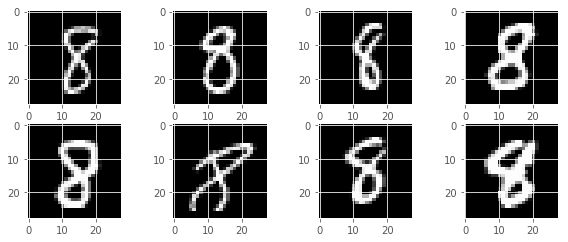

In [22]:
%matplotlib inline 
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots 
plt.rcParams['image.interpolation'] = 'nearest' 
plt.rcParams['image.cmap'] = 'gray' 

digit = 8

rand_samples = randImgs(digit, x_trainval, y_trainval)

plot_samples(rand_samples)

plt.savefig('fig1.pdf')   # Save the figures in case you want to use it in the presentation
plt.show()   # These should be some visualization of data at the end of this section

# 2. Digit classifiers

In this section, you'll begin developing models to perform digit classification.

Each model needs to be structured like so:
  1. Give a brief reason which model you are going to train and why you choose it
  1. Define hyper-parameters for model and optimization procedure
  1. Define your model
  1. Define optimization method and fit model to data
  1. Summarize your findings







# 2.1: Model [M1]: 

**Support Vector Machines:** *In classification, this algorithm tries to separate the different classes in the feature space by marking the gap between the classes using support vectors in addition to the hyperplane between them.*

# Preprocessing 

### Centering and rescaling the data to ensure mean = 0 and std. dev = 1 using StandardScaler(). Required step for PCA.

In [6]:
scaler = StandardScaler()

scaler.fit(x_trainval)

x_tr = scaler.transform(x_trainval)

x_te = scaler.transform(x_test)

C:\Users\Chirag Bhuvaneshwara\Documents\Softwares\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [7]:
print(x_tr.shape, x_te.shape)

(60000, 784) (10000, 784)


# Dimensionality Reduction

### Reducing the dimension of the data while retaining 95% of the variance.

In [8]:
pca = PCA(.95)

pca.fit(x_tr)

X_trP = pca.transform(x_tr)
X_teP = pca.transform(x_te)

In [9]:
y_trP = y_trainval
y_teP = y_test
print(X_trP.shape, X_teP.shape)
print(y_trP.shape, y_teP.shape)

(60000, 331) (10000, 331)
(60000,) (10000,)


In [10]:
x_trainval, y_trainval, x_test, y_test = X_trP, y_trP, X_teP, y_teP 

### 2.1.1: Hyper-parameters



In [11]:
param_grid = {'C': [.75, 1, 1.25], 
              'gamma' : [1/1000, 1/784],
              'kernel': ['poly']}

### 2.1.2: Model

In [12]:
svm = SVC()
svm_cv = GridSearchCV(svm, param_grid, cv=2, verbose = 10)

### 2.1.3 Fit Model

In [13]:
svm_cv.fit(x_trainval,y_trainval)

Fitting 2 folds for each of 6 candidates, totalling 12 fits
[CV] C=0.75, gamma=0.001, kernel=poly ................................
[CV]  C=0.75, gamma=0.001, kernel=poly, score=0.8875445788754458, total=11.3min
[CV] C=0.75, gamma=0.001, kernel=poly ................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 15.6min remaining:    0.0s


[CV]  C=0.75, gamma=0.001, kernel=poly, score=0.8890555722238891, total=11.0min
[CV] C=0.75, gamma=0.0012755102040816326, kernel=poly ................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 30.7min remaining:    0.0s


[CV]  C=0.75, gamma=0.0012755102040816326, kernel=poly, score=0.9267073292670733, total= 8.7min
[CV] C=0.75, gamma=0.0012755102040816326, kernel=poly ................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 43.0min remaining:    0.0s


[CV]  C=0.75, gamma=0.0012755102040816326, kernel=poly, score=0.9275927592759275, total= 8.6min
[CV] C=1, gamma=0.001, kernel=poly ...................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 55.0min remaining:    0.0s


[CV]  C=1, gamma=0.001, kernel=poly, score=0.9065760090657601, total=10.1min
[CV] C=1, gamma=0.001, kernel=poly ...................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 69.0min remaining:    0.0s


[CV]  C=1, gamma=0.001, kernel=poly, score=0.9065239857319065, total=10.0min
[CV] C=1, gamma=0.0012755102040816326, kernel=poly ...................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 82.9min remaining:    0.0s


[CV]  C=1, gamma=0.0012755102040816326, kernel=poly, score=0.9368063193680632, total= 8.1min
[CV] C=1, gamma=0.0012755102040816326, kernel=poly ...................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed: 94.3min remaining:    0.0s


[CV]  C=1, gamma=0.0012755102040816326, kernel=poly, score=0.9371270460379372, total= 7.9min
[CV] C=1.25, gamma=0.001, kernel=poly ................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 105.4min remaining:    0.0s


[CV]  C=1.25, gamma=0.001, kernel=poly, score=0.9173749291737493, total= 9.4min
[CV] C=1.25, gamma=0.001, kernel=poly ................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 118.6min remaining:    0.0s


[CV]  C=1.25, gamma=0.001, kernel=poly, score=0.918091809180918, total= 9.3min
[CV] C=1.25, gamma=0.0012755102040816326, kernel=poly ................
[CV]  C=1.25, gamma=0.0012755102040816326, kernel=poly, score=0.9425057494250575, total= 7.4min
[CV] C=1.25, gamma=0.0012755102040816326, kernel=poly ................
[CV]  C=1.25, gamma=0.0012755102040816326, kernel=poly, score=0.9430276360969431, total= 7.3min


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed: 152.4min finished


GridSearchCV(cv=2, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.75, 1, 1.25], 'gamma': [0.001, 0.0012755102040816326], 'kernel': ['poly']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=10)

In [16]:
y_pred_svm = svm_cv.predict(x_test)

### 2.1.4 Evaluation

[[0.8883     0.92715   ]
 [0.90655    0.93696667]
 [0.91773333 0.94276667]]


C:\Users\Chirag Bhuvaneshwara\Documents\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


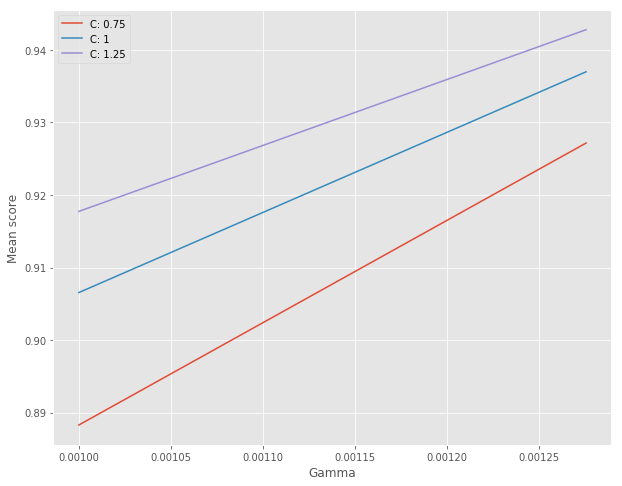

In [21]:
scores = [x[1] for x in svm_cv.grid_scores_]
scores = np.array(scores).reshape(len(param_grid['C']), len(param_grid['gamma']))

print(scores)

for ind, i in enumerate(param_grid['C']):
    plt.plot(param_grid['gamma'], scores[ind], label='C: ' + str(i))
    
plt.legend()
plt.xlabel('Gamma')
plt.ylabel('Mean score')
plt.show()

In [18]:
r2 = svm_cv.score(x_test, y_test)
mse = mean_squared_error(y_test, y_pred_svm)

print("Tuned SVM best score: {}".format(svm_cv.best_score_))
print("Tuned SVM best params: {}".format(svm_cv.best_params_))
print("Tuned SVM R squared: {}".format(r2))
print("Tuned SVM MSE: {}".format(mse))

Tuned SVM best score: 0.9427666666666666
Tuned SVM best params: {'C': 1.25, 'gamma': 0.0012755102040816326, 'kernel': 'poly'}
Tuned SVM R squared: 0.9604
Tuned SVM MSE: 0.7768


### 2.1.5 Summary

 * Which hyper-parameters were important and how did they influence your results?
 > *The penalty parameter C and the kernel coefficient gamma are important. As gamma and C increase, the test accuracy during cross validation increases. A larger value of C was chosen which indicates that the algorithm performs better with smaller margin hyperplane. A large value of gamma indicates that a higher bias is required compared to the variance.*
 
 * What were other design choices you faced?
 > *There is an option to select the type of kernel(linear, rbf, poly) and we chose poly kernel as the image dataset is unlikely to have a linear decision boundary (And rbf took too long).*
 
 * Any other interesting insights...
 > *RBF kernel is too complicated and takes too long to finish execution. *

# 2.2: Model [M2]: 

The second model we use is a vanilla neural network- a multilayer pereceptron with just one hidden layer. It's a feedforward artificial neural network that uses backpropogation for training. We choose this simple one-layer network to classify digits and vary the number of units in the hidden layer, along with different activation functions (sigmoid and ReLU). We also experiment using different optimization techniques, namely Adam and SGD.

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()   #using keras datasets
x_train_orig = x_train # just keeping a backup for visualization

image_size = 784 # 28 x 28      # will use it for flattening the dataset
x_train = x_train.reshape(x_train.shape[0], image_size) 
x_test = x_test.reshape(x_test.shape[0], image_size)

num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes) 
y_test = keras.utils.to_categorical(y_test, num_classes)

x_trainval= x_train
y_trainval = y_train

print('x_trainval.shape = {},  y_trainval.shape = {}'.format(x_trainval.shape, y_trainval.shape))
print('x_test.shape = {},  y_test.shape = {}'.format(x_test.shape, y_test.shape))


# Feel free to have multiple variables in case your models are designed for different formats
# For instance, in case your model requires Nx28x28 inputs, declare x_trainval_3d, etc.

# Tip: Set this to a tiny number (such 0.05) to aid debugging
# After all, you do not want to train/evaluate on the entire dataset to find bugs
DEBUG_FRAC = 0.05
# Resample x_[], y_[]

x_trainval.shape = (60000, 784),  y_trainval.shape = (60000, 10)
x_test.shape = (10000, 784),  y_test.shape = (10000, 10)



### 2.2.1: Hyper-parameters

In [6]:
nodes = [32,64,128,256]
activation = ['sigmoid', 'relu']
optimizer = ['sgd','Adam']

test_set = 'test'  #  or 'test'
# # Decide all your hyperparameters based on validation performance
# # Then, switch to 'test' for final evaluation
# if test_set == 'val':
#     x_train, y_train = x_trainval[0:48000], y_trainval[0:48000]
#     x_eval, y_eval = x_trainval[48000:60000], y_trainval[48000:60000]
#     print(x_train.shape, y_train.shape)
#     print(x_trainval.shape, y_trainval.shape)
# else:
#     x_train, y_train = x_trainval, y_trainval
#     x_eval, y_eval = x_test, y_test
#     print(x_train.shape, y_train.shape)
#     print(x_trainval.shape, y_tradef build_model(nodes, activation):
    model = Sequential()
    model.add(Dense(units=32 , activation= 'sigmoid', input_shape=(image_size,)))
    model.add(Dense(units=nodes, activation= activation))
    model.add(Dense(units=num_classes, activation='softmax'))
    return modeldef evaluate(model, optimizer, batch_size=128, epochs=10):
    #model.summary()
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,validation_split=.2, verbose=True)
    loss,accuracy = model.evaluate(x_test, y_test, verbose=True)

    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()
    
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()
                                                                                                                                                    

    print()
    print(f'Val loss: {loss:.3}')
    print(f'Val accuracy: {accuracy:.3}')
    return loss,accuracy
inval.shape)

### 2.2.2: Model

In [7]:
def build_model(nodes, activation):
    model = Sequential()
    model.add(Dense(units=32 , activation= 'sigmoid', input_shape=(image_size,)))
    model.add(Dense(units=nodes, activation= activation))
    model.add(Dense(units=num_classes, activation='softmax'))
    return model

### 2.2.3 Fit Model

In [12]:
def evaluate(model, optimizer, batch_size=128, epochs=10):
    #model.summary()
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,validation_split=.2, verbose=True)
    loss,accuracy = model.evaluate(x_test, y_test, verbose=True)

    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()
    
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()
                                                                                                                                                    

    print()
    print(f'Val loss: {loss:.3}')
    print(f'Val accuracy: {accuracy:.3}')
    return loss,accuracy


### 2.2.4 Evaluation

32 sigmoid sgd
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 2s 37us/step - loss: 2.1834 - acc: 0.3172 - val_loss: 2.0421 - val_acc: 0.5135
Epoch 2/10
48000/48000 [==============================] - 1s 29us/step - loss: 1.9438 - acc: 0.5603 - val_loss: 1.8322 - val_acc: 0.6406
Epoch 3/10
48000/48000 [==============================] - 2s 34us/step - loss: 1.7424 - acc: 0.6429 - val_loss: 1.6362 - val_acc: 0.6773
Epoch 4/10
48000/48000 [==============================] - 2s 31us/step - loss: 1.5536 - acc: 0.6887 - val_loss: 1.4515 - val_acc: 0.7174
Epoch 5/10
48000/48000 [==============================] - 1s 30us/step - loss: 1.3790 - acc: 0.7287 - val_loss: 1.2873 - val_acc: 0.7629
Epoch 6/10
48000/48000 [==============================] - 2s 34us/step - loss: 1.2269 - acc: 0.7605 - val_loss: 1.1457 - val_acc: 0.7835
Epoch 7/10
48000/48000 [==============================] - 2s 33us/step - loss: 1.0966 - acc: 0.7875 - val_loss: 1

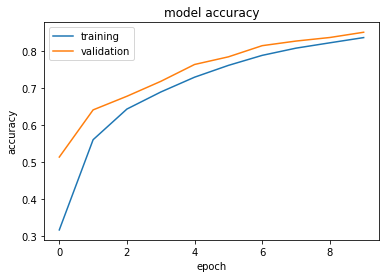

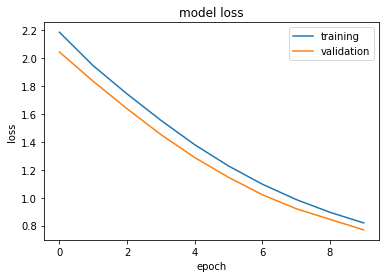


Val loss: 0.769
Val accuracy: 0.85
32 sigmoid Adam
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 2s 38us/step - loss: 1.4745 - acc: 0.6576 - val_loss: 0.8444 - val_acc: 0.8328
Epoch 2/10
48000/48000 [==============================] - 1s 27us/step - loss: 0.6683 - acc: 0.8476 - val_loss: 0.5083 - val_acc: 0.8783
Epoch 3/10
48000/48000 [==============================] - 1s 27us/step - loss: 0.4753 - acc: 0.8756 - val_loss: 0.4196 - val_acc: 0.8850
Epoch 4/10
48000/48000 [==============================] - 1s 27us/step - loss: 0.4148 - acc: 0.8842 - val_loss: 0.3706 - val_acc: 0.8984
Epoch 5/10
48000/48000 [==============================] - 1s 28us/step - loss: 0.3772 - acc: 0.8925 - val_loss: 0.3587 - val_acc: 0.8959
Epoch 6/10
48000/48000 [==============================] - 1s 27us/step - loss: 0.3750 - acc: 0.8901 - val_loss: 0.3528 - val_acc: 0.8951
Epoch 7/10
48000/48000 [==============================] - 1s 27us/step - los

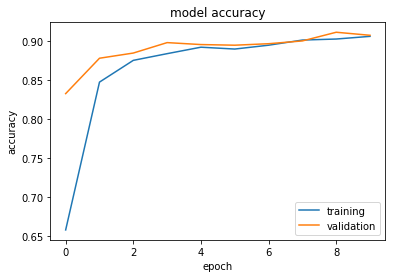

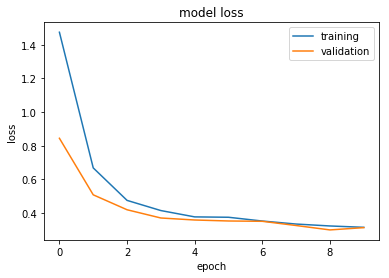


Val loss: 0.313
Val accuracy: 0.908
32 relu sgd
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 2s 35us/step - loss: 1.7679 - acc: 0.4636 - val_loss: 1.3197 - val_acc: 0.6962
Epoch 2/10
48000/48000 [==============================] - 1s 27us/step - loss: 1.0836 - acc: 0.7436 - val_loss: 0.8632 - val_acc: 0.8022
Epoch 3/10
48000/48000 [==============================] - 1s 27us/step - loss: 0.7725 - acc: 0.8142 - val_loss: 0.6473 - val_acc: 0.8472
Epoch 4/10
48000/48000 [==============================] - 1s 27us/step - loss: 0.6042 - acc: 0.8488 - val_loss: 0.5395 - val_acc: 0.8618
Epoch 5/10
48000/48000 [==============================] - 1s 27us/step - loss: 0.5169 - acc: 0.8655 - val_loss: 0.4589 - val_acc: 0.8795
Epoch 6/10
48000/48000 [==============================] - 1s 26us/step - loss: 0.4669 - acc: 0.8735 - val_loss: 0.4393 - val_acc: 0.8822
Epoch 7/10
48000/48000 [==============================] - 1s 27us/step - loss: 

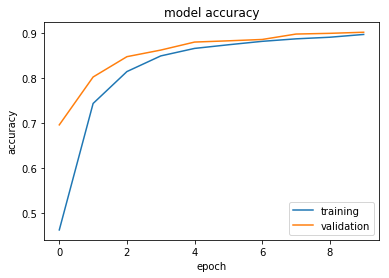

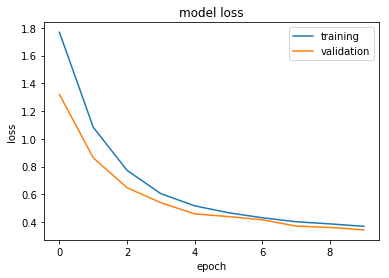


Val loss: 0.343
Val accuracy: 0.901
32 relu Adam
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 2s 44us/step - loss: 1.0915 - acc: 0.6996 - val_loss: 0.5397 - val_acc: 0.8435
Epoch 2/10
48000/48000 [==============================] - 2s 33us/step - loss: 0.4833 - acc: 0.8594 - val_loss: 0.4331 - val_acc: 0.8732
Epoch 3/10
48000/48000 [==============================] - 2s 33us/step - loss: 0.4297 - acc: 0.8720 - val_loss: 0.4008 - val_acc: 0.8783
Epoch 4/10
48000/48000 [==============================] - 2s 34us/step - loss: 0.3997 - acc: 0.8793 - val_loss: 0.3801 - val_acc: 0.8862
Epoch 5/10
48000/48000 [==============================] - 2s 35us/step - loss: 0.3827 - acc: 0.8848 - val_loss: 0.3581 - val_acc: 0.8947
Epoch 6/10
48000/48000 [==============================] - 2s 37us/step - loss: 0.3617 - acc: 0.8904 - val_loss: 0.3326 - val_acc: 0.9010
Epoch 7/10
48000/48000 [==============================] - 2s 41us/step - loss:

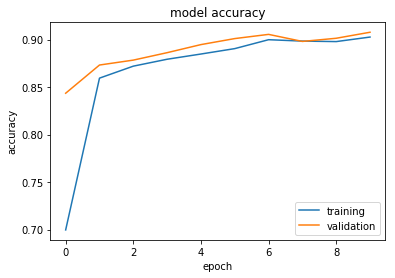

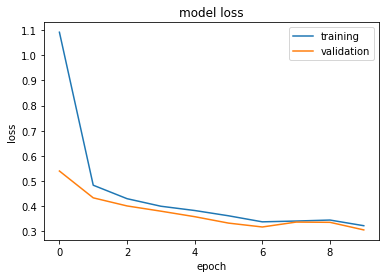


Val loss: 0.306
Val accuracy: 0.908
64 sigmoid sgd
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 2s 50us/step - loss: 2.1757 - acc: 0.3523 - val_loss: 2.0375 - val_acc: 0.5381
Epoch 2/10
48000/48000 [==============================] - 2s 44us/step - loss: 1.9311 - acc: 0.5770 - val_loss: 1.8157 - val_acc: 0.6604
Epoch 3/10
48000/48000 [==============================] - 1s 31us/step - loss: 1.7058 - acc: 0.6768 - val_loss: 1.5837 - val_acc: 0.7348
Epoch 4/10
48000/48000 [==============================] - 3s 61us/step - loss: 1.4766 - acc: 0.7509 - val_loss: 1.3575 - val_acc: 0.7901
Epoch 5/10
48000/48000 [==============================] - 3s 59us/step - loss: 1.2688 - acc: 0.7933 - val_loss: 1.1588 - val_acc: 0.8253
Epoch 6/10
48000/48000 [==============================] - 2s 39us/step - loss: 1.0930 - acc: 0.8213 - val_loss: 1.0013 - val_acc: 0.8460
Epoch 7/10
48000/48000 [==============================] - 1s 26us/step - los

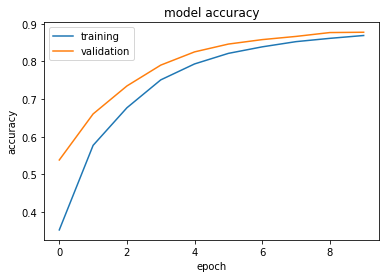

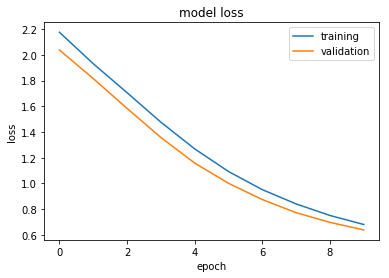


Val loss: 0.639
Val accuracy: 0.877
64 sigmoid Adam
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 3s 63us/step - loss: 1.3317 - acc: 0.6815 - val_loss: 0.6629 - val_acc: 0.8520
Epoch 2/10
48000/48000 [==============================] - 2s 37us/step - loss: 0.5435 - acc: 0.8565 - val_loss: 0.4434 - val_acc: 0.8765
Epoch 3/10
48000/48000 [==============================] - 2s 42us/step - loss: 0.4282 - acc: 0.8774 - val_loss: 0.4026 - val_acc: 0.8832
Epoch 4/10
48000/48000 [==============================] - 2s 45us/step - loss: 0.3938 - acc: 0.8833 - val_loss: 0.3613 - val_acc: 0.8967
Epoch 5/10
48000/48000 [==============================] - 2s 43us/step - loss: 0.3645 - acc: 0.8867 - val_loss: 0.3486 - val_acc: 0.8918
Epoch 6/10
48000/48000 [==============================] - 2s 47us/step - loss: 0.3514 - acc: 0.8921 - val_loss: 0.3349 - val_acc: 0.9002
Epoch 7/10
48000/48000 [==============================] - 2s 49us/step - lo

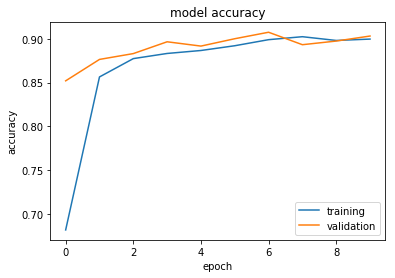

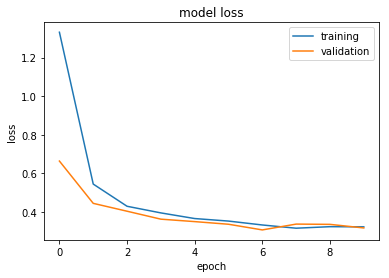


Val loss: 0.316
Val accuracy: 0.903
64 relu sgd
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 2s 39us/step - loss: 1.7349 - acc: 0.5286 - val_loss: 1.2165 - val_acc: 0.7459
Epoch 2/10
48000/48000 [==============================] - 2s 45us/step - loss: 0.9546 - acc: 0.7867 - val_loss: 0.7212 - val_acc: 0.8346
Epoch 3/10
48000/48000 [==============================] - 2s 44us/step - loss: 0.6422 - acc: 0.8438 - val_loss: 0.5163 - val_acc: 0.8760
Epoch 4/10
48000/48000 [==============================] - 2s 51us/step - loss: 0.5103 - acc: 0.8689 - val_loss: 0.4694 - val_acc: 0.8793
Epoch 5/10
48000/48000 [==============================] - 2s 36us/step - loss: 0.4477 - acc: 0.8804 - val_loss: 0.4110 - val_acc: 0.8899
Epoch 6/10
48000/48000 [==============================] - 2s 45us/step - loss: 0.4058 - acc: 0.8887 - val_loss: 0.3635 - val_acc: 0.9018
Epoch 7/10
48000/48000 [==============================] - 2s 39us/step - loss: 

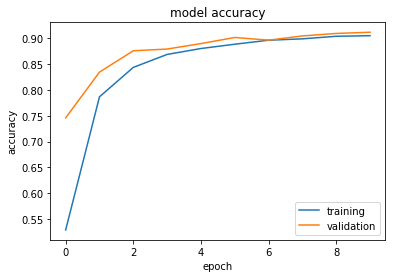

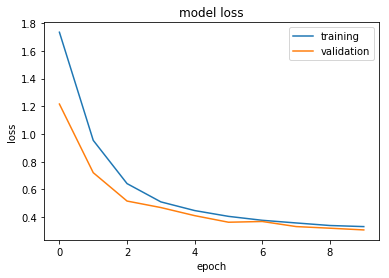


Val loss: 0.308
Val accuracy: 0.912
64 relu Adam
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 2s 51us/step - loss: 0.9352 - acc: 0.7337 - val_loss: 0.4423 - val_acc: 0.8719
Epoch 2/10
48000/48000 [==============================] - 2s 42us/step - loss: 0.4393 - acc: 0.8679 - val_loss: 0.3698 - val_acc: 0.8898
Epoch 3/10
48000/48000 [==============================] - 2s 45us/step - loss: 0.3810 - acc: 0.8839 - val_loss: 0.3455 - val_acc: 0.8980
Epoch 4/10
48000/48000 [==============================] - 2s 36us/step - loss: 0.3541 - acc: 0.8920 - val_loss: 0.3370 - val_acc: 0.8990
Epoch 5/10
48000/48000 [==============================] - 2s 41us/step - loss: 0.3404 - acc: 0.8962 - val_loss: 0.3092 - val_acc: 0.9040
Epoch 6/10
48000/48000 [==============================] - 2s 35us/step - loss: 0.3314 - acc: 0.8972 - val_loss: 0.3229 - val_acc: 0.8986
Epoch 7/10
48000/48000 [==============================] - 2s 35us/step - loss:

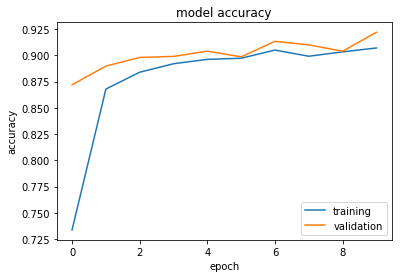

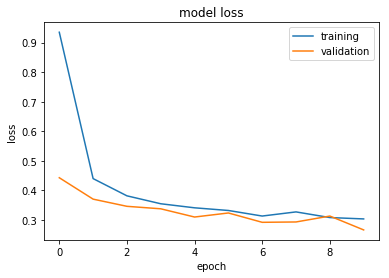


Val loss: 0.266
Val accuracy: 0.922
128 sigmoid sgd
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 2s 48us/step - loss: 2.2117 - acc: 0.3459 - val_loss: 2.1104 - val_acc: 0.5144
Epoch 2/10
48000/48000 [==============================] - 2s 33us/step - loss: 2.0030 - acc: 0.6023 - val_loss: 1.8729 - val_acc: 0.6773
Epoch 3/10
48000/48000 [==============================] - 1s 31us/step - loss: 1.7523 - acc: 0.7046 - val_loss: 1.6160 - val_acc: 0.7497
Epoch 4/10
48000/48000 [==============================] - 2s 32us/step - loss: 1.4994 - acc: 0.7548 - val_loss: 1.3673 - val_acc: 0.7978
Epoch 5/10
48000/48000 [==============================] - 2s 37us/step - loss: 1.2681 - acc: 0.7976 - val_loss: 1.1511 - val_acc: 0.8257
Epoch 6/10
48000/48000 [==============================] - 2s 36us/step - loss: 1.0750 - acc: 0.8269 - val_loss: 0.9780 - val_acc: 0.8455
Epoch 7/10
48000/48000 [==============================] - 1s 31us/step - lo

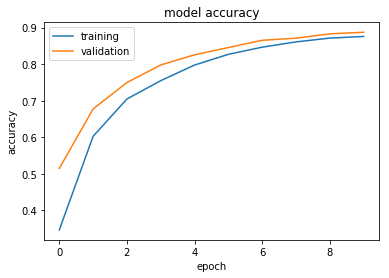

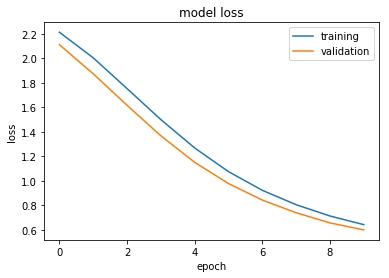


Val loss: 0.6
Val accuracy: 0.887
128 sigmoid Adam
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 3s 56us/step - loss: 1.1891 - acc: 0.7004 - val_loss: 0.5630 - val_acc: 0.8616
Epoch 2/10
48000/48000 [==============================] - 3s 53us/step - loss: 0.4907 - acc: 0.8653 - val_loss: 0.3952 - val_acc: 0.8877
Epoch 3/10
48000/48000 [==============================] - 2s 42us/step - loss: 0.4081 - acc: 0.8805 - val_loss: 0.3718 - val_acc: 0.8880
Epoch 4/10
48000/48000 [==============================] - 2s 36us/step - loss: 0.3780 - acc: 0.8885 - val_loss: 0.3791 - val_acc: 0.8882
Epoch 5/10
48000/48000 [==============================] - 2s 39us/step - loss: 0.3497 - acc: 0.8955 - val_loss: 0.3364 - val_acc: 0.8971
Epoch 6/10
48000/48000 [==============================] - 2s 40us/step - loss: 0.3408 - acc: 0.8966 - val_loss: 0.3343 - val_acc: 0.8969
Epoch 7/10
48000/48000 [==============================] - 2s 37us/step - los

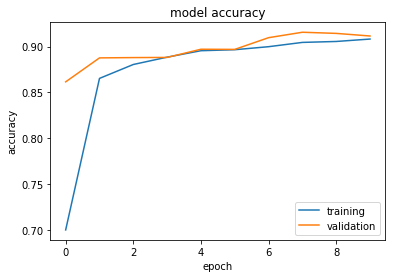

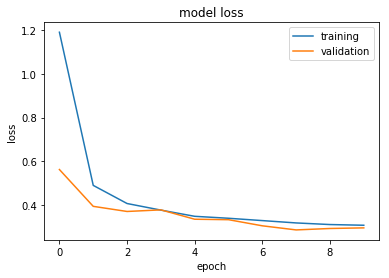


Val loss: 0.297
Val accuracy: 0.911
128 relu sgd
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 2s 51us/step - loss: 1.7841 - acc: 0.5098 - val_loss: 1.2576 - val_acc: 0.7367
Epoch 2/10
48000/48000 [==============================] - 2s 36us/step - loss: 0.9677 - acc: 0.7841 - val_loss: 0.7168 - val_acc: 0.8423
Epoch 3/10
48000/48000 [==============================] - 2s 44us/step - loss: 0.6386 - acc: 0.8451 - val_loss: 0.5251 - val_acc: 0.8721
Epoch 4/10
48000/48000 [==============================] - 2s 39us/step - loss: 0.5098 - acc: 0.8669 - val_loss: 0.4623 - val_acc: 0.8787
Epoch 5/10
48000/48000 [==============================] - 2s 50us/step - loss: 0.4530 - acc: 0.8771 - val_loss: 0.4166 - val_acc: 0.8857
Epoch 6/10
48000/48000 [==============================] - 2s 38us/step - loss: 0.4142 - acc: 0.8838 - val_loss: 0.3840 - val_acc: 0.8926
Epoch 7/10
48000/48000 [==============================] - 2s 44us/step - loss:

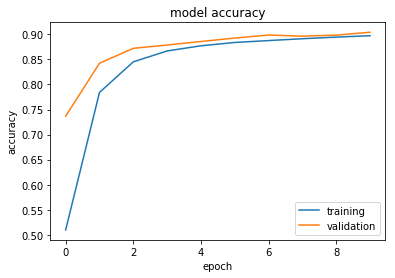

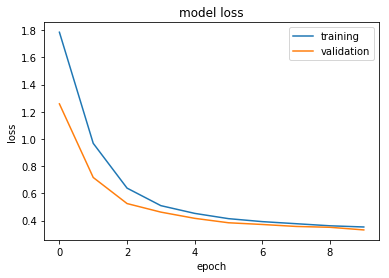


Val loss: 0.331
Val accuracy: 0.904
128 relu Adam
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 3s 52us/step - loss: 0.8469 - acc: 0.7508 - val_loss: 0.4484 - val_acc: 0.8639
Epoch 2/10
48000/48000 [==============================] - 1s 30us/step - loss: 0.4372 - acc: 0.8654 - val_loss: 0.3684 - val_acc: 0.8866
Epoch 3/10
48000/48000 [==============================] - 1s 29us/step - loss: 0.3726 - acc: 0.8851 - val_loss: 0.3428 - val_acc: 0.8950
Epoch 4/10
48000/48000 [==============================] - 1s 29us/step - loss: 0.3525 - acc: 0.8913 - val_loss: 0.3413 - val_acc: 0.8952
Epoch 5/10
48000/48000 [==============================] - 1s 29us/step - loss: 0.3349 - acc: 0.8960 - val_loss: 0.3028 - val_acc: 0.9082
Epoch 6/10
48000/48000 [==============================] - 1s 30us/step - loss: 0.3173 - acc: 0.9034 - val_loss: 0.2950 - val_acc: 0.9135
Epoch 7/10
48000/48000 [==============================] - 1s 29us/step - loss

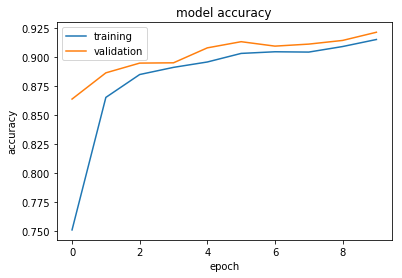

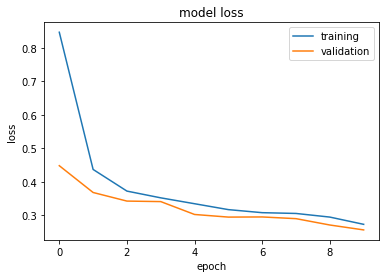


Val loss: 0.257
Val accuracy: 0.922


In [13]:
nodes = [32,64,128]
activation = ['sigmoid', 'relu']
optimizer = ['sgd','Adam']
order = []

x_train, y_train = x_trainval, y_trainval
x_test, y_test = x_trainval[48000:60000], y_trainval[48000:60000]    #for validation purpose

for nodes in (32,64,128):
    for activation in ('sigmoid', 'relu'):
        for optimizer in ('sgd', 'Adam'):
                model = build_model(nodes, activation)
                print(nodes,activation,optimizer)
                loss,accuracy = evaluate(model, optimizer)
                order.append([nodes,activation,optimizer, loss, accuracy])
                

In [ ]:
accuracy = []
for i in range(len(order)):
#     print(order[i])
     accuracy.append(order[i][4])
best_idx = np.argmax(accuracy)
#print(order[np.argmax(accuracy)])
best_node = order[best_idx][0]
best_activation = order[best_idx][1]
best_optimizer = order[best_idx][2]

In [15]:
test_set = 'test'
x_train, y_train = x_trainval, y_trainval
x_eval, y_eval = x_test, y_test
print(x_train.shape, y_train.shape)
print(x_trainval.shape, y_trainval.shape)
print(best_node,best_activation,best_optimizer)
model = build_model(best_node, best_activation)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=True)
loss, accuracy  = model.evaluate(x_test, y_test, verbose=True)
        
# plt.plot(history.history['acc'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['training', 'validation'], loc='best')
# plt.show()
                                                                                                                                                    
print()
print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')



(60000, 784) (60000, 10)
(60000, 784) (60000, 10)
64 relu Adam
Epoch 1/10
60000/60000 [==============================] - 3s 49us/step - loss: 0.8477 - acc: 0.7586
Epoch 2/10
60000/60000 [==============================] - 2s 42us/step - loss: 0.4265 - acc: 0.8702
Epoch 3/10
60000/60000 [==============================] - 2s 38us/step - loss: 0.3788 - acc: 0.8840
Epoch 4/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.3513 - acc: 0.8927
Epoch 5/10
60000/60000 [==============================] - 2s 39us/step - loss: 0.3298 - acc: 0.8980
Epoch 6/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.3165 - acc: 0.9034
Epoch 7/10
60000/60000 [==============================] - 2s 38us/step - loss: 0.2997 - acc: 0.9085
Epoch 8/10
60000/60000 [==============================] - 2s 39us/step - loss: 0.3064 - acc: 0.9073
Epoch 9/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.2877 - acc: 0.9118
Epoch 10/10
12000/12000 [============

In [16]:
for i in range(len(order)):
     print(order[i])

[32, 'sigmoid', 'sgd', 0.7694115246136983, 0.84975]
[32, 'sigmoid', 'Adam', 0.3133016201953093, 0.9078333333333334]
[32, 'relu', 'sgd', 0.34326245547334355, 0.90125]
[32, 'relu', 'Adam', 0.3055034521371126, 0.9076666666666666]
[64, 'sigmoid', 'sgd', 0.638778508345286, 0.8774166666666666]
[64, 'sigmoid', 'Adam', 0.31567778466145197, 0.90325]
[64, 'relu', 'sgd', 0.3080057594080766, 0.9119166666666667]
[64, 'relu', 'Adam', 0.2655165327688058, 0.922]
[128, 'sigmoid', 'sgd', 0.5998072069485982, 0.8874166666666666]
[128, 'sigmoid', 'Adam', 0.297000273813804, 0.9115]
[128, 'relu', 'sgd', 0.33146701892217, 0.9041666666666667]
[128, 'relu', 'Adam', 0.25672008155783016, 0.9216666666666666]


### 2.2.5 Summary

Summarize your findings:
 * Which hyper-parameters were important and how did they influence your results?
 
    We find that the numer of units in the layer, activation function and choice of optimization algorithm- all 
    influence the architecture design. Using relu over sigmoid gives better results overall, Adam optimization 
    additionally boosts the accuracy by approximately 2-3% over SGD. We find the optimal number of nodes here to be 64
    as compared.
    
    
 * What were other design choices you faced?
 
    We decided to pick a single layer MLP, the other design choices could have been adding more layers, changing the 
    number of units in the respective layers, varying the number of epochs, experimenting with learning rate of      different optimization algorithms and so on.  
    
    
 * Any other interesting insights...
 
    We found that when using no hidden layer: that is just give the input layer and the output softmax layer- we got a 
    better accuracy of 93.7%. I find this a bit intriguing.

# 2.2: Model [M2]: *Convolutional Neural Network*

Model submitted in a separate notebook as the third memmber of our team joined our team very close to the deadline. We apologize for the inconvenience caused.

# 3. Summary

Enter your final summary here.

You should now compare performance  on the three models [M1], [M2] and [M3]. Present this in a tabular format and/or using plots.

Which model do you recommend to perform digit classification and why?

Feel free to discuss other insightful observations.